# Section 1

## Binary search (Algorithm)

In general, for any list of n, binary search will take **log2(n)** steps to run in the worst case, whereas simple search will take **n** steps. So if a phone book contains 128 entries **in order**, it will take a maximum of **log2(128) = 7 steps**. 

In [2]:
def search_iterative(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2
      guess = list[mid]
      # Found the item.
      if guess == item:
        return mid
      # The guess was too high.
      if guess > item:
        high = mid - 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None

# item is the value in our list that we're looking for.

search_iterative([1, 3, 5, 7, 9], item=3) # we are looking for the number 3 in our list.

1

So we find the middle of the list then guess to see if the corresponding element is our item. If the guess is too low we raise the lower bound to be the middle of the list, and vice versa. Binary search runs in `O(logn)`.

## Big O notation

There are 5 Big O runtimes.

* O(log n), also known as log time. Example: Binary search.
* O(n), also known as linear time. Example: Simple search.
* O(n * log n). Example: A fast sorting algorithm, like quicksort
* O(n2). Example: A slow sorting algorithm, like selection sort
* O(n!). Example: A really slow algorithm, like the traveling salesperson


# Section 2 

## How Memory Works, Arrays and Linked Lists

Picture 'memory' as a large checker box with an address for each box. If you want to store more than one item in memory, there are two ways of going about it - arrays and linked lists.

- Array: If you have a todo list, all tasks are stored contiguously (right next to each other) in memory. If there's only 4 adjacent addresses available and you have 5 items that you want to store, the computer will find a location with 5 addresses free, and will move all your items there. If you need more spaces and don't have it available, you'll have to move again. **Adding** more items to arrays is slow. Linked lists are the solution.

- Linked lists: Each item stores the address of the next item in the list. A bunch of random memory addresses are linked together. So, the 1st address gives the position of the 2nd address, and the 2nd address gives the position of the 3rd address and so on. **Adding** more items to linked lists is fast. You simply choose any random address, make note of it and then add your item. Then, give your previous address the location you just noted down.

So what are arrays good for? 

If you have a list of 10 items in a linked list and want to know the final one, you will have to go from 1 to 2 to 3 to ... 10. **Linked lists are bad if you're jumping around**.

With arrays, on the other hand, if you want the 5th item and you know the first address starts at 0x0000, then the 5th address is 0x0004. Arrays are great if you want to read random elements, because you can look up any element in your array instantly. Here are their runtimes:

<img src=attachment:de0ceaf4-f464-43fe-8e53-00c4f88b6896.png width=500 />
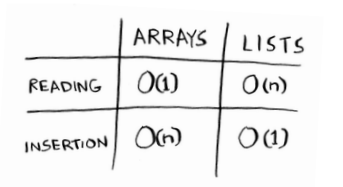

Note that because linked lists have read: O(n), if you intend on reading every element then O(n) is the fastest way of doing that. (This is because, if you want to read all n elements, then it must take at least n reads and therefore, O(n). It's only when doing random jumps that linked lists suffer the most with.

**Inserting to the middle of a list**

Doing this with linked lists is easy: You find the middle address (hard) and you redirect the previous address to point to your new middle item (easy). With an array, you need to shift all items down one slot. If you run out of space, you'll have to copy everything to a new location.

**Deleting a middle element of a list**

Exact same idea as above. Linked lists make it easy because you redirect the pointer. With arrays, you have to shift everything back one slot.

Here are the runtimes:

<img src=attachment:d722eaa3-edf5-4fd4-8342-6420c559c1aa.png width=500 />

It's worth mentioning that for the O(1) runtimes, we assume that we can instantly access the element. We know that in reality, for a linked list, we must iterate sequentially until we reach the element that we want to delete/insert into. **Since we normally insert or append, it is extremely useful to know the first address (to speed up inserting) and the last address (to speed up appending), therefore computers do this. This is why inserting is so fast with linked lists, we can safely assume that we know the last item in a linked list, so to append one item, all we've got to do is give the address of our appended item to our last item.**
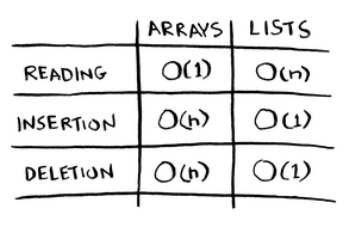

To summarise:

**Linked lists only allow sequential access**\
**Arrays allow random access** - we often say arrays have faster reads because they provide random access. Many data structures are implemented using arrays because of random access.

## Selection Sort (Sorting Algorithm)

Suppose you have a list of n artists and you want to sort them from highest to lowest play count. You could just find the highest in the list and move it to a new list and keep on repeating. To do this, you will have to read the list n times if there are n items.

<img src=attachment:b7c0c2a2-2f5d-4680-8a20-646f42162a4d.png width=500 />
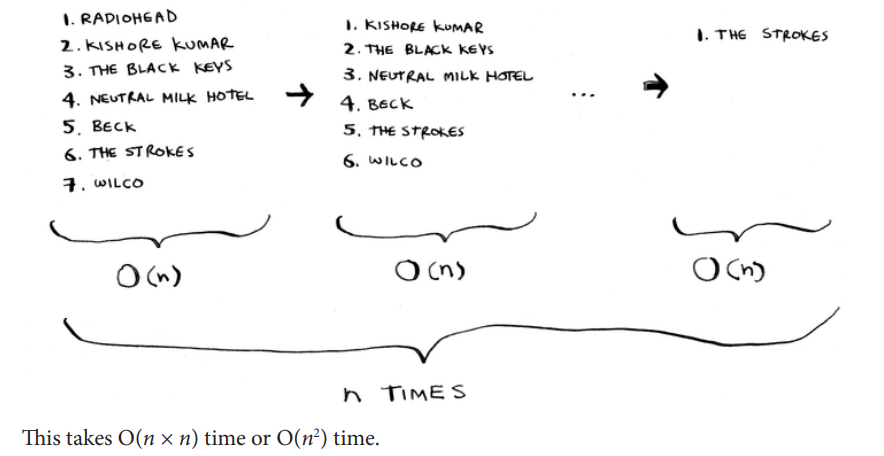

This takes O(n * n) = O(n^2) time. You might wonder why the runtime is not smaller given the fact that the list reduces in size after each read. On the first read, you read n items, then n-1 items, then n-2, all the way until 1 item remains. So, on average you read 1/2 * n items. This means that the runtime is actually O(n * 1/2 * n) but we can drop all constants so we return back to O(n^2) time.

Here's a python implementation for selection sort. We need a helper function.

In [11]:
def find_smallest_index(arr):
    smallest_value = arr[0]
    smallest_index = 0
    for i in range(len(arr)):
        if arr[i] < smallest_value:
            smallest_value = arr[i]
            smallest_index = i
    
    return smallest_index

def selection_sort(arr):
    
    new_arr = []
    
    for i in range(len(arr)):
        
        # arr.pop(smallest_value_index) removes that value from the array and also returns it so that we can store it in our new_arr.
        smallest_value_index = find_smallest_index(arr)
        new_arr.append(arr.pop(smallest_value_index)) #
                                                      
    return new_arr
                       
                    
arr = [3, 5, 6, 1, 2]
                       
selection_sort(arr)

[1, 2, 3, 5, 6]

# Section 3